Execution time for load_data: 0.0007 seconds
Execution time for preprocess_data: 0.0023 seconds
Execution time for compute_features: 0.0003 seconds


/var/folders/x0/47rgp04x7js6kj9sclly_60m0000gn/T/ipykernel_66503/2209907191.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


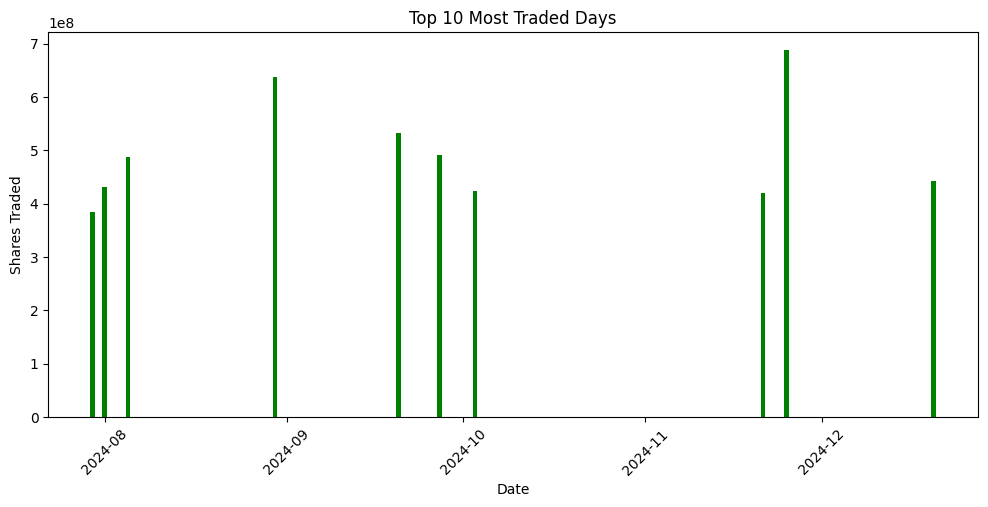

Execution time for plot_most_traded_days: 0.0376 seconds


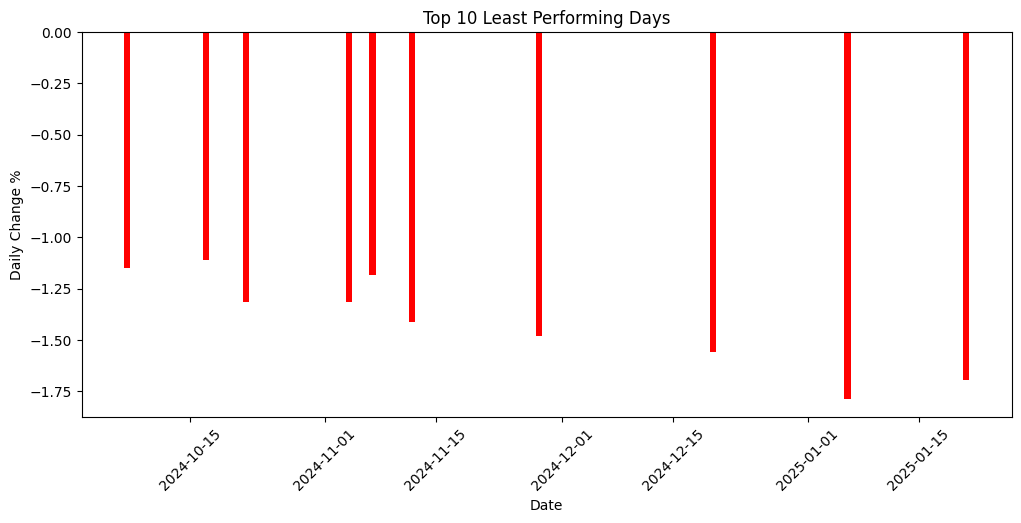

Execution time for plot_least_performing_days: 0.0486 seconds


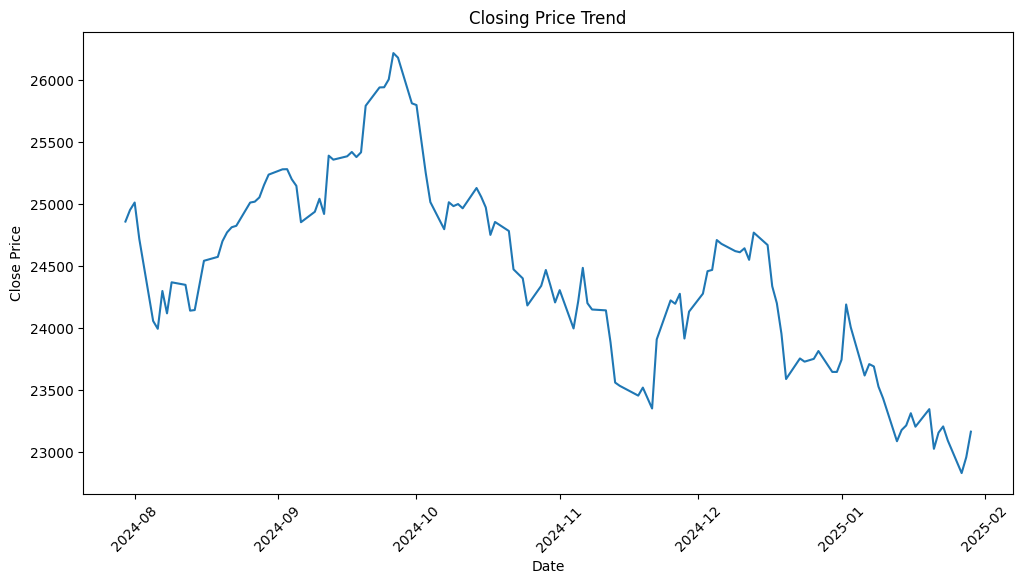

Execution time for plot_closing_price: 0.0467 seconds


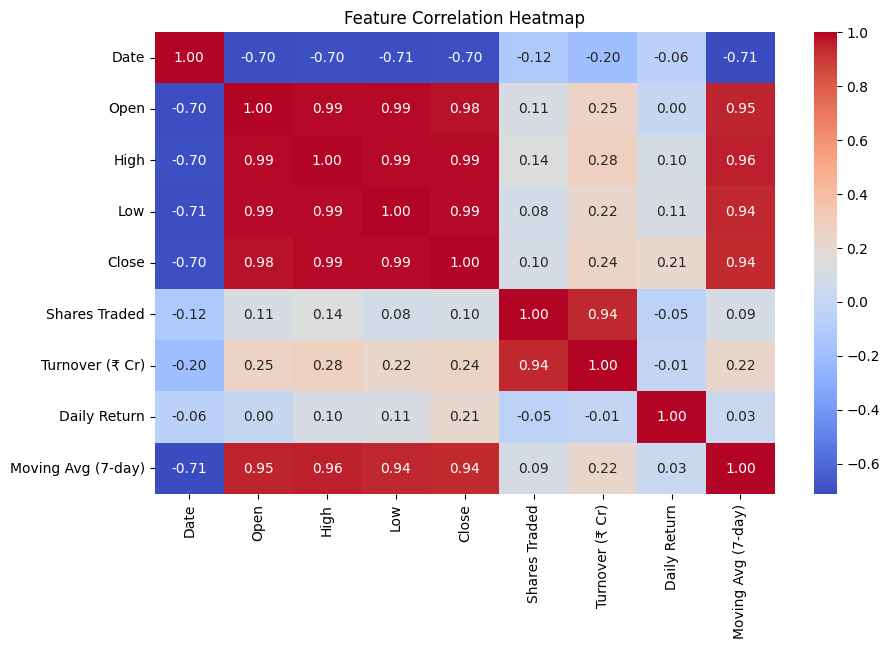

Execution time for plot_correlation_heatmap: 0.0774 seconds


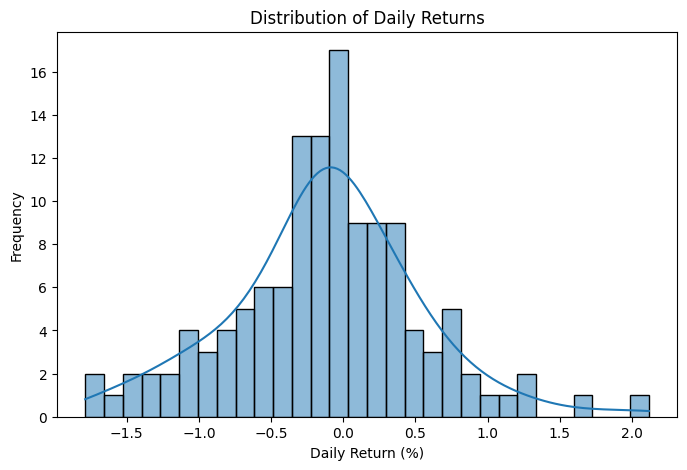

Execution time for plot_daily_return_distribution: 0.0464 seconds

--- Analysis Results ---
{'Closing Price Trend': [(Timestamp('2024-07-30 00:00:00'), 24857.3),
                         (Timestamp('2024-07-31 00:00:00'), 24951.15),
                         (Timestamp('2024-08-01 00:00:00'), 25010.9),
                         (Timestamp('2024-08-02 00:00:00'), 24717.7),
                         (Timestamp('2024-08-05 00:00:00'), 24055.6),
                         (Timestamp('2024-08-06 00:00:00'), 23992.55),
                         (Timestamp('2024-08-07 00:00:00'), 24297.5),
                         (Timestamp('2024-08-08 00:00:00'), 24117.0),
                         (Timestamp('2024-08-09 00:00:00'), 24367.5),
                         (Timestamp('2024-08-12 00:00:00'), 24347.0),
                         (Timestamp('2024-08-13 00:00:00'), 24139.0),
                         (Timestamp('2024-08-14 00:00:00'), 24143.75),
                         (Timestamp('2024-08-16 00:00:00'), 24541

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pprint
import json
from contextlib import contextmanager

# Custom decorator for timing
def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time for {func.__name__}: {end_time - start_time:.4f} seconds")
        return result
    return wrapper


# Load data function
@timing_decorator
def load_data(filepath):
    with file_handler(filepath, 'r') as file:
        df = pd.read_csv(file)
    return df

# Preprocessing data
@timing_decorator
def preprocess_data(df):
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    df.dropna(inplace=True)  # Drop missing values
    df.drop_duplicates(inplace=True)  # Remove duplicates
    return df

# Feature engineering
@timing_decorator
def compute_features(df):
    if {'Open', 'Close'}.issubset(df.columns):
        df['Daily Return'] = (df['Close'] - df['Open']) / df['Open'] * 100
    if 'Close' in df.columns:
        df['Moving Avg (7-day)'] = df['Close'].rolling(window=7).mean()
    return df

# Visualization functions
@timing_decorator
def plot_closing_price(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df['Date'], y=df['Close'])
    plt.title('Closing Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.show()

@timing_decorator
def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.show()

@timing_decorator
def plot_daily_return_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Daily Return'], bins=30, kde=True)
    plt.title('Distribution of Daily Returns')
    plt.xlabel('Daily Return (%)')
    plt.ylabel('Frequency')
    plt.show()

@timing_decorator
def plot_most_traded_days(df):
    if 'Shares Traded' in df.columns:
        most_traded_days = df.nlargest(10, 'Shares Traded')
        plt.figure(figsize=(12, 5))
        plt.bar(most_traded_days['Date'], most_traded_days['Shares Traded'], color='green')
        plt.xticks(rotation=45)
        plt.xlabel("Date")
        plt.ylabel("Shares Traded")
        plt.title("Top 10 Most Traded Days")
        plt.show()
        return most_traded_days[['Date', 'Shares Traded']].to_dict(orient='records')

@timing_decorator
def plot_least_performing_days(df):
    if 'Daily Return' in df.columns:
        least_performing_days = df.nsmallest(10, 'Daily Return')
        plt.figure(figsize=(12, 5))
        plt.bar(least_performing_days['Date'], least_performing_days['Daily Return'], color='red')
        plt.xticks(rotation=45)
        plt.xlabel("Date")
        plt.ylabel("Daily Change %")
        plt.title("Top 10 Least Performing Days")
        plt.show()
        return least_performing_days[['Date', 'Daily Return']].to_dict(orient='records')

# Main execution
if __name__ == "__main__":
    filepath = "nifty_fifty.csv"  # Update with actual file path

    # Load and process data
    df = load_data(filepath)
    df = preprocess_data(df)
    df = compute_features(df)

    # Store analysis results
    analysis_results = {
        "Closing Price Trend": list(zip(df['Date'].tolist(), df['Close'].tolist())),
        "Feature Correlation Heatmap": df.corr().to_dict(),
        "Daily Return Distribution": df['Daily Return'].tolist(),
        "Most Traded Days": plot_most_traded_days(df),
        "Least Performing Days": plot_least_performing_days(df)
    }

    # Visualizations
    plot_closing_price(df)
    plot_correlation_heatmap(df)
    plot_daily_return_distribution(df)

    # Display analysis results
    print("\n--- Analysis Results ---")
    pprint.pprint(analysis_results, width=150)

    # Alternative JSON formatted output
    def convert_timestamp(obj):
        """Convert Pandas Timestamp to string format."""
        if isinstance(obj, pd.Timestamp):
            return obj.strftime('%Y-%m-%d')  # Convert to string format
        raise TypeError(f"Type {type(obj)} not serializable")

    print(json.dumps(analysis_results, indent=4, default=convert_timestamp))
